In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Linear Múltipla <br> 
## DIAGNÓSTICO DE HETEROCEDASTICIDADE

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

Correlação entre o termo de erro e a variável explicativa. No exemplo, temos uma figura de um cone entre SAEB e rendimento.

**corr[X,u] <> 0 -> existe heterocedasticidade (correlação estatisticamente diferente de 0)**

Variância não constante dos termos de erro ao longo de X ou ao longo de Yhat se tiver mais de uma variável X.

**Sobre o fenômeno da Heterocedasticidade podemos afirmar:**

- É decorrente da omissão de variáveis preditoras significativas no modelo final estimado;
- Pode ser reduzido por meio da inclusão de variáveis preditoras de Y cuja os parâmetros Beta se mostrarem estatisticamente significantes após o procedimento stepwise;
- Os termos de erro serão heterocedásticos quando eles estiverem fazendo as vezes de variáveis preditoras significantes para a explicação do comportamento de Y que foram omitidas no modelo final estimado e se fossem consideradas ficariam no modelo após o procedimento stepwise;



## Aplicação MQO (OLS)

1) Estimação do modelo linear com stepwise<br>
2) Aplica teste Shapiro Francia nos resíduos:<br>
- Deu aderência à normalidade? Modelo validado <br>
- Não deu aderência à normalidade? Aplica transformação Box-Cox <br>

3) Aplica modelo novamente com stepwise<br>
4) Aplica teste shapiro Francia novamente nos resíduos:



## Contexto

Censo escolar da educação básica do Brasil.
SAEB - sistema de avaliação da educação básica: reflete níveis de aprendizagem dos estudantes
Ensino Fundamental do 6o ao 9o ano.
Rendimento: aprovação, reprovação ou abandono (fluxo).

SAEB ~ rendimento

In [2]:
#Importa base e transforma em objeto
saeb_rend = pd.read_csv(r'bases\saeb_rend.csv')
saeb_rend['codigo'] = saeb_rend['codigo'].astype('str')
saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629
...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156


In [3]:
saeb_rend.describe()

,saeb,rendimento
count,25538.000000,37324.000000
mean,5.047511,0.856967
std,0.753718,0.110447
min,2.053000,0.247282
25%,4.554542,0.791561
50%,5.069500,0.878536
75%,5.551458,0.944761
max,8.588000,1.000000


In [4]:
saeb_rend.groupby('uf')['municipio'].count()

uf
AC     204
AL     718
AM     972
AP     172
BA    3539
CE    2971
DF     217
ES     831
GO    1400
MA    2761
MG    4399
MS     643
MT     966
PA    2046
PB    1075
PE    1866
PI    1289
PR    1886
RJ    2310
RN     859
RO     468
RR     128
RS    3315
SC    1742
SE     562
SP    5753
TO     515
Name: municipio, dtype: int64

In [5]:
saeb_rend.groupby('rede')['municipio'].count()

rede
Estadual     20959
Federal         38
Municipal    22610
Name: municipio, dtype: int64

## Gráfico de Dispersão 

Figura de um cone é um indício de heterocedasticidade.

Não necessariamente prejudica a previsão do modelo, nesse caso quanto mairo o X pode dificultar a previsibilidade já que o erro é maior em relação a valores menores de X.

Em alguns valores de X pode inclusive ajudar na previsibilidade. 

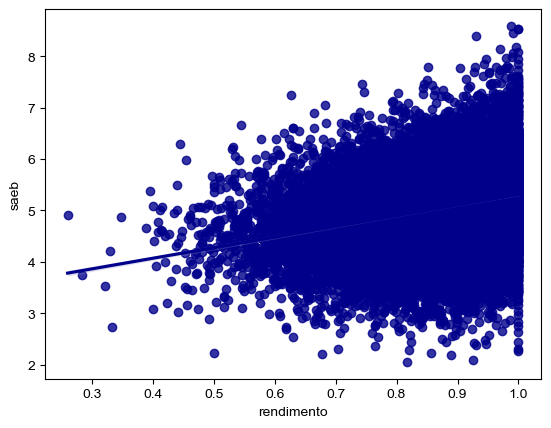

In [6]:
sns.regplot(saeb_rend.rendimento, saeb_rend.saeb, scatter=True, color='darkblue')
sns.set_style({'axes.grid' : True})
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

<AxesSubplot:xlabel='rendimento', ylabel='saeb'>

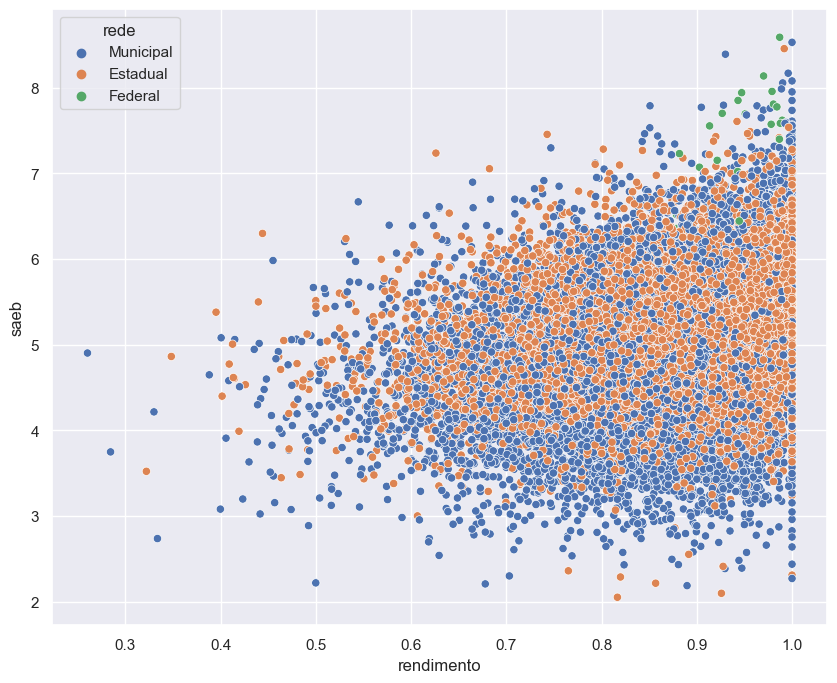

In [7]:
sns.scatterplot(saeb_rend.rendimento, saeb_rend.saeb, hue= saeb_rend.rede)

## Diagnóstico de Heterocedasticidade

R2 baixo em decorrência da Heterocedasticidade. <br>
Esse é o modelo do Primeiro Gráfico.

Significância estatística com R2 baixo é indício de heterocedasticidade.

In [8]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelosaeb = sm.OLS.from_formula(formula = 'saeb ~ rendimento', data=saeb_rend).fit()
modelosaeb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:22:46   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2425      0.039     82.277      0.000       3.165       3.320
rendimento     2.0665      0.045     46.111      0.000       1.979       2.154
==============================================================================
Omnibus:                      152.496   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.269
Skew:                          -0.091   Prob(JB):                     1.97e-44
Kurtosis:                       3.395   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Teste de Breusch-Pagan

> H0: Ausência de heterocedasticidade

> H1: heterocedasticidade, ou seja, correlação entre resíduos e uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

P-value < 0,05 existe heterocedasticidade <br>
P-value >= 0,05 é homogênio

In [ ]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html
from statsmodels.compat import lzip

variaveis = pd.DataFrame()
variaveis['const'] = 1
variaveis['rendimento'] = saeb_rend.rendimento


name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(modelosaeb.resid, variaveis)

lzip(name, test)

### ---------------------------------Breush-Pagen Manual---------------------------------------

In [10]:
saeb_rend['yhat'] = modelosaeb.fittedvalues
saeb_rend['resid'] = modelosaeb.resid
saeb_na = saeb_rend.dropna(axis=0, subset='saeb')
saeb_rend['up'] = ((saeb_na.resid.dropna()**2)/ ((sum(saeb_na.resid.dropna()**2))/(25530)))
saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento,yhat,resid,up
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,4.825556,0.506278,0.488848
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,NaN,NaN,NaN
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,5.070567,0.361767,0.249605
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,NaN,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,5.221359,0.347474,0.230272
...,...,...,...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,5.113792,0.344208,0.225964
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,5.066579,-0.170913,0.055711
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,4.982381,0.209286,0.083536
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,4.825688,0.331978,0.210192


### ANOVA

In [11]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=saeb_rend, res_var='up', anova_model=f'up ~ yhat')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,33.441401,33.441401,13.966877,0.000186
Residual,25528.0,61122.616057,2.394336,NaN,NaN


In [12]:
from scipy.stats import chi2

mean = 33.441401/2

p = 1- chi2.cdf(mean, 1)

In [13]:
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 16.7207005
P-value: 4.330588881340525e-05


P-value < 0,05 - existe heterocedasticidade

### -----------------------------------------------------------------------------------------------

## Inserindo as Variáveis Dummies UF

Tentar mitigar a heterocedasticidade para melhorar a acurácida do modelo. <br>
Ainda existem variáveis relevantes para melhorar o modelo.

In [14]:
saeb_rend_dummies_uf = pd.read_csv(r'bases\saeb_rend.csv')
saeb_rend_dummies_uf = saeb_rend_dummies_uf.join(pd.get_dummies(saeb_rend_dummies_uf.uf))
saeb_rend_dummies_uf = saeb_rend_dummies_uf.drop('SP', axis=1)
saeb_rend_dummies_uf

,uf,municipio,codigo,escola,rede,saeb,rendimento,AC,AL,AM,...,PI,PR,RJ,RN,RO,RR,RS,SC,SE,TO
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelo Com Variável UF

In [15]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

model = LinearRegression()

saeb_na_dum = saeb_rend_dummies_uf.dropna()

X = saeb_na_dum.iloc[:,6:].dropna()
y = saeb_na_dum.saeb.dropna()

modelo_dummies_uf = model.fit(X, y)


In [16]:
summary = pd.DataFrame(modelo_dummies_uf.coef_, index=X.columns, columns=['betas'])
summary

,betas
rendimento,1.244424
AC,-0.437130
AL,-0.605100
AM,-0.685102
AP,-0.972775
BA,-0.682261
CE,-0.078002
DF,0.005447
ES,0.147163
GO,0.056434


## Teste de Breusch-Pagan

Houve uma melhora no modelo após inserir a variável UF. <br>

**Não existe mais Heterodasticidade**


Mudando a referência da variável Dummy, não altera o teste Breusch-Pagen

In [17]:
saeb_na_dum['yhat'] = modelo_dummies_uf.predict(X)
saeb_na_dum['resid'] = saeb_na_dum['saeb'] - saeb_na_dum['yhat']
saeb_na_dum['up'] = ((saeb_na_dum.resid**2)/ ((sum(saeb_na_dum.resid**2))/(25530)))

In [18]:
res.anova_stat(df=saeb_na_dum, res_var='up', anova_model=f'up ~ yhat')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,2.151248,2.151248,0.720861,0.39587
Residual,25528.0,76182.579747,2.984275,NaN,NaN


In [19]:
from scipy.stats import chi2

mean = 2.151248/2
p = 1- chi2.cdf(mean, 1)

In [20]:
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 1.075624
P-value: 0.29967856375074586


<AxesSubplot:xlabel='rendimento', ylabel='saeb'>

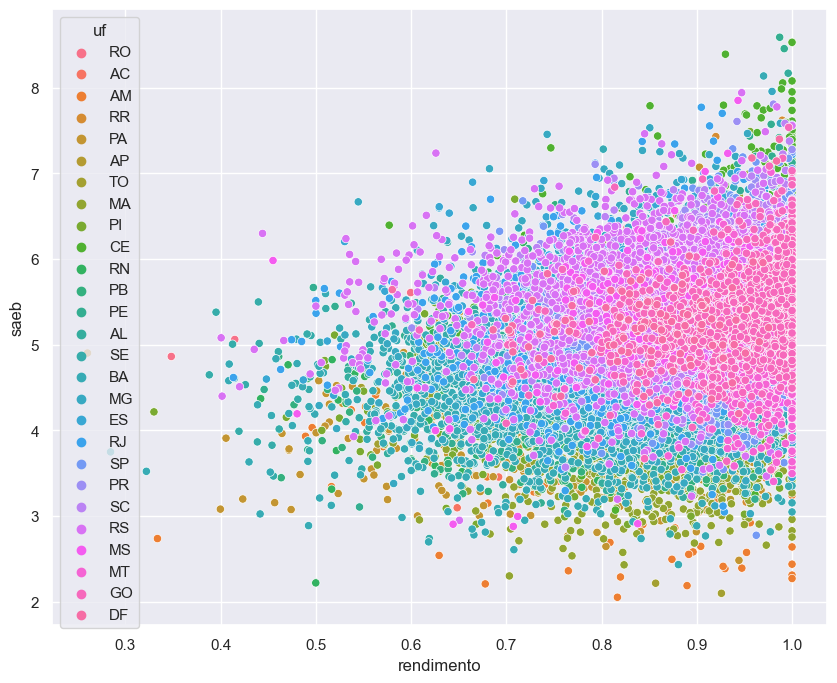

In [21]:
sns.scatterplot(saeb_rend.rendimento, saeb_rend.saeb, hue= saeb_rend.uf)